<a href="https://colab.research.google.com/github/BrenoMilagres/DataScienceProjetos/blob/master/modeloPreditivoCampBrasileiroTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#importando os dados para o google colab
from google.colab import files
uploaded = files.upload()

In [152]:
times = pd.read_csv('campeonato-brasileiro-full.csv')

In [153]:
times.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


In [154]:
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Horário                7582 non-null   object
 1   Dia                    7939 non-null   object
 2   Data                   7939 non-null   object
 3   Clube 1                7939 non-null   object
 4   Clube 2                7939 non-null   object
 5   Vencedor               7939 non-null   object
 6   Rodada                 7939 non-null   object
 7   Arena                  7939 non-null   object
 8   Clube 1 Gols           7939 non-null   int64 
 9   Clube 2 Gols           7939 non-null   int64 
 10  Clube 1 Estado         7939 non-null   object
 11  Clube 2 Estado         7939 non-null   object
 12  Estado Clube Vencedor  7939 non-null   object
dtypes: int64(2), object(11)
memory usage: 806.4+ KB


#### Renomeando colunas

In [155]:
times = times.rename(columns={'Clube 1':'Mandante','Clube 2':'Visitante','Clube 1 Gols':'MandanteGols','Clube 2 Gols':'VisitanteGols'})
times.head()

,Horário,Dia,Data,Mandante,Visitante,Vencedor,Rodada,Arena,MandanteGols,VisitanteGols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


In [156]:
times.describe()

,MandanteGols,VisitanteGols
count,7939.000000,7939.000000
mean,1.596801,1.052526
std,1.251372,1.039719
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,7.000000,7.000000


#### Definindo colunas interessantes ao modelo

In [157]:
entradas = ['Data','Mandante','Visitante','MandanteGols','VisitanteGols','Vencedor','Rodada']
df_entradas = times[entradas]

#### Transformando a coluna Data para datetime e criando uma coluna apenas com o ano 

In [158]:
df_entradas['Data']= pd.to_datetime(df_entradas['Data'],format='%Y/%m/%d')
df_entradas['Ano'] = df_entradas['Data'].dt.year
df_entradas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           7939 non-null   datetime64[ns]
 1   Mandante       7939 non-null   object        
 2   Visitante      7939 non-null   object        
 3   MandanteGols   7939 non-null   int64         
 4   VisitanteGols  7939 non-null   int64         
 5   Vencedor       7939 non-null   object        
 6   Rodada         7939 non-null   object        
 7   Ano            7939 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 496.3+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Obtendo a média de gols feitos e sofridos por temporada 

In [159]:
avgMandanteTemporada = df_entradas.groupby(['Mandante','Ano'])['MandanteGols'].mean().reset_index()
avgVisitanteTemporada = df_entradas.groupby(['Visitante','Ano'])['VisitanteGols'].mean().reset_index()

avgMandanteTemporada = avgMandanteTemporada.rename(columns={'MandanteGols':'avgGFMandante'})
avgVisitanteTemporada = avgVisitanteTemporada.rename(columns={'VisitanteGols':'avgGFVisitante'})


print(avgMandanteTemporada)
print(avgVisitanteTemporada)

       Mandante   Ano  avgGFMandante
0    América-MG  2000       1.500000
1    América-MG  2001       1.214286
2    América-MG  2011       1.736842
3    América-MG  2016       0.684211
4    América-MG  2018       1.157895
..          ...   ...            ...
449     Vitória  2013       1.684211
450     Vitória  2014       1.210526
451     Vitória  2016       1.578947
452     Vitória  2017       1.157895
453     Vitória  2018       1.157895

[454 rows x 3 columns]
      Visitante   Ano  avgGFVisitante
0    América-MG  2000        0.666667
1    América-MG  2001        1.153846
2    América-MG  2011        0.947368
3    América-MG  2016        0.526316
4    América-MG  2018        0.421053
..          ...   ...             ...
452     Vitória  2014        0.736842
453     Vitória  2016        1.105263
454     Vitória  2017        1.473684
455     Vitória  2018        0.736842
456  portuguesa  2001        1.000000

[457 rows x 3 columns]


In [160]:
avgGSMandanteTemporada = df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].mean().reset_index()
avgGSVisitanteTemporada = df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].mean().reset_index()

avgGSMandanteTemporada = avgGSMandanteTemporada.rename(columns={'VisitanteGols':'avgGSMandante'})
avgGSVisitanteTemporada = avgGSVisitanteTemporada.rename(columns={'MandanteGols':'avgGSVisitante'})


print(avgGSMandanteTemporada)
print(avgGSVisitanteTemporada)

      Ano       Mandante  avgGSMandante
0    2000     América-MG       0.916667
1    2000   Athlético-PR       1.000000
2    2000    Atlético-MG       1.692308
3    2000          BAHIA       3.000000
4    2000          Bahia       1.230769
..    ...            ...            ...
449  2019  Internacional       0.789474
450  2019      Palmeiras       0.684211
451  2019         Santos       0.789474
452  2019      São Paulo       0.631579
453  2019          Vasco       1.157895

[454 rows x 3 columns]
      Ano      Visitante  avgGSVisitante
0    2000     América-MG        2.000000
1    2000   Athlético-PR        1.307692
2    2000    Atlético-MG        1.818182
3    2000          BAHIA        3.000000
4    2000          Bahia        1.363636
..    ...            ...             ...
452  2019  Internacional        1.263158
453  2019      Palmeiras        1.000000
454  2019         Santos        0.947368
455  2019      São Paulo        0.947368
456  2019          Vasco        1.210526

[45

#### Obtendo o Total de vitórias 
> Verifiquei que essa feature  não influencia positivamente o modelo.

In [97]:
nVitoriasM = df_entradas.loc[df_entradas['Vencedor'] == df_entradas['Mandante']]
nVitoriasM = nVitoriasM.groupby(['Ano'])['Vencedor'].value_counts().to_frame(name='nVitoriasM')
nVitoriasM = nVitoriasM.reset_index(level=['Ano','Vencedor'])
print(nVitoriasM)


      Ano     Vencedor  nVitoriasM
0    2000   Fluminense           9
1    2000  Ponte Preta           9
2    2000        Bahia           8
3    2000       Grêmio           8
4    2000   Portuguesa           8
..    ...          ...         ...
440  2019          CSA           6
441  2019   Fluminense           6
442  2019     Cruzeiro           5
443  2019  Chapecoense           4
444  2019         Avaí           1

[445 rows x 3 columns]


In [98]:
nVitoriasV = df_entradas.loc[df_entradas['Vencedor'] == df_entradas['Visitante']]
nVitoriasV = nVitoriasV.groupby(['Ano'])['Vencedor'].value_counts().to_frame(name='nVitoriasV')
nVitoriasV = nVitoriasV.reset_index(level=['Ano','Vencedor'])
print(nVitoriasV)

      Ano      Vencedor  nVitoriasV
0    2000     Palmeiras           6
1    2000  Athlético-PR           5
2    2000      Cruzeiro           5
3    2000         Goiás           4
4    2000        Grêmio           4
..    ...           ...         ...
430  2019   Chapecoense           3
431  2019          Avaí           2
432  2019           CSA           2
433  2019         Ceará           2
434  2019      Cruzeiro           2

[435 rows x 3 columns]


#### Obetendo Total de gols marcados nos últimos 5 jogos.

In [161]:
# Total de gols marcados útimos 3 jogos Mandante
df_entradas['nGF_U3_Mandante'] = (df_entradas.groupby(['Ano','Mandante'])['MandanteGols'].shift(1) + 
df_entradas.groupby(['Ano','Mandante'])['MandanteGols'].shift(2) +
df_entradas.groupby(['Ano','Mandante'])['MandanteGols'].shift(3)+
df_entradas.groupby(['Ano','Mandante'])['MandanteGols'].shift(4)+
df_entradas.groupby(['Ano','Mandante'])['MandanteGols'].shift(5)
)

# Total dos gols marcados útimos 3 jogos Visitante
df_entradas['nGF_U3_Visitante'] = (df_entradas.groupby(['Ano','Visitante'])['VisitanteGols'].shift(1) + 
df_entradas.groupby(['Ano','Visitante'])['VisitanteGols'].shift(2) +
df_entradas.groupby(['Ano','Visitante'])['VisitanteGols'].shift(3)+
df_entradas.groupby(['Ano','Visitante'])['VisitanteGols'].shift(4)+
df_entradas.groupby(['Ano','Visitante'])['VisitanteGols'].shift(5)
)

# Total de  gols sofridos ultimos 3 jogos Mandante
df_entradas['nGS_U3_Mandante'] = (df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].shift(1) + 
df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].shift(2) +
df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].shift(3)+
df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].shift(4)+
df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].shift(5)
)

# Total de  gols sofridos ultimos 3 jogos Visitante
df_entradas['nGS_U3_Visitante'] = (df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].shift(1) + 
df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].shift(2) +
df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].shift(3) +
df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].shift(4) +
df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].shift(5) 
)


df_entradas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              7939 non-null   datetime64[ns]
 1   Mandante          7939 non-null   object        
 2   Visitante         7939 non-null   object        
 3   MandanteGols      7939 non-null   int64         
 4   VisitanteGols     7939 non-null   int64         
 5   Vencedor          7939 non-null   object        
 6   Rodada            7939 non-null   object        
 7   Ano               7939 non-null   int64         
 8   nGF_U3_Mandante   5753 non-null   float64       
 9   nGF_U3_Visitante  5750 non-null   float64       
 10  nGS_U3_Mandante   5753 non-null   float64       
 11  nGS_U3_Visitante  5750 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 744.4+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

#### Colocando Variaveis no DataFrame 

In [162]:

df_entradas =pd.merge(avgMandanteTemporada,df_entradas) 
df_entradas =pd.merge (avgVisitanteTemporada,df_entradas) 


df_entradas =pd.merge (avgGSMandanteTemporada,df_entradas)
df_entradas =pd.merge (avgGSVisitanteTemporada,df_entradas)




df_entradas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7939 entries, 0 to 7938
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Ano               7939 non-null   int64         
 1   Visitante         7939 non-null   object        
 2   avgGSVisitante    7939 non-null   float64       
 3   Mandante          7939 non-null   object        
 4   avgGSMandante     7939 non-null   float64       
 5   avgGFVisitante    7939 non-null   float64       
 6   avgGFMandante     7939 non-null   float64       
 7   Data              7939 non-null   datetime64[ns]
 8   MandanteGols      7939 non-null   int64         
 9   VisitanteGols     7939 non-null   int64         
 10  Vencedor          7939 non-null   object        
 11  Rodada            7939 non-null   object        
 12  nGF_U3_Mandante   5753 non-null   float64       
 13  nGF_U3_Visitante  5750 non-null   float64       
 14  nGS_U3_Mandante   5753 n

#### Eliminando valores nulos 

In [163]:
df_entradas = df_entradas.loc[df_entradas['nGF_U3_Mandante'].notnull()]
df_entradas = df_entradas.loc[df_entradas['nGF_U3_Visitante'].notnull()]

df_entradas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5621 entries, 0 to 7938
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Ano               5621 non-null   int64         
 1   Visitante         5621 non-null   object        
 2   avgGSVisitante    5621 non-null   float64       
 3   Mandante          5621 non-null   object        
 4   avgGSMandante     5621 non-null   float64       
 5   avgGFVisitante    5621 non-null   float64       
 6   avgGFMandante     5621 non-null   float64       
 7   Data              5621 non-null   datetime64[ns]
 8   MandanteGols      5621 non-null   int64         
 9   VisitanteGols     5621 non-null   int64         
 10  Vencedor          5621 non-null   object        
 11  Rodada            5621 non-null   object        
 12  nGF_U3_Mandante   5621 non-null   float64       
 13  nGF_U3_Visitante  5621 non-null   float64       
 14  nGS_U3_Mandante   5621 n

In [164]:
df_entradas.tail(10)

,Ano,Visitante,avgGSVisitante,Mandante,avgGSMandante,avgGFVisitante,avgGFMandante,Data,MandanteGols,VisitanteGols,Vencedor,Rodada,nGF_U3_Mandante,nGF_U3_Visitante,nGS_U3_Mandante,nGS_U3_Visitante
7926,2019,Vasco,1.210526,Ceará,0.736842,1.0,1.210526,2019-10-26,1,1,-,28ª Rodada,1.0,5.0,4.0,3.0
7927,2019,Vasco,1.210526,Chapecoense,1.157895,1.0,0.842105,2019-09-14,1,2,Vasco,19ª Rodada,3.0,3.0,4.0,5.0
7928,2019,Vasco,1.210526,Corinthians,0.684211,1.0,1.315789,2019-09-29,1,0,Corinthians,22ª Rodada,9.0,5.0,3.0,5.0
7929,2019,Vasco,1.210526,Cruzeiro,0.894737,1.0,0.684211,2019-09-01,1,0,Cruzeiro,17ª Rodada,3.0,4.0,4.0,5.0
7930,2019,Vasco,1.210526,Flamengo,0.947368,1.0,2.947368,2019-11-13,4,4,-,34ª Rodada,13.0,5.0,3.0,1.0
7931,2019,Vasco,1.210526,Fluminense,0.789474,1.0,0.947368,2019-11-02,0,0,-,30ª Rodada,7.0,4.0,5.0,3.0
7933,2019,Vasco,1.210526,Goiás,1.210526,1.0,1.631579,2019-08-11,0,1,Vasco,14ª Rodada,8.0,3.0,3.0,8.0
7935,2019,Vasco,1.210526,Internacional,0.789474,1.0,1.473684,2019-10-20,0,1,Vasco,27ª Rodada,6.0,4.0,3.0,4.0
7936,2019,Vasco,1.210526,Palmeiras,0.684211,1.0,2.105263,2019-07-27,1,1,-,12ª Rodada,12.0,3.0,0.0,11.0
7938,2019,Vasco,1.210526,São Paulo,0.631579,1.0,1.210526,2019-11-28,1,0,São Paulo,35ª Rodada,4.0,9.0,3.0,5.0


#### Criando a variavel total de gols, e redividindo-a em intervalos.(obtendo saída)
> Para Total de gols menor ou igual a 3, {x = 0}

> Para Total de gols maior que 3, {x = 1}

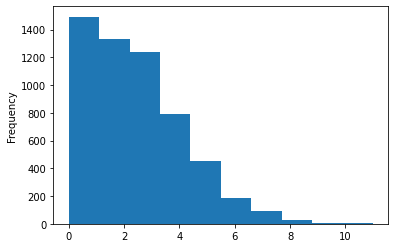

In [165]:
df_entradas['total_gols'] = df_entradas['MandanteGols'] + df_entradas['VisitanteGols']
df_entradas.total_gols.plot(kind='hist')

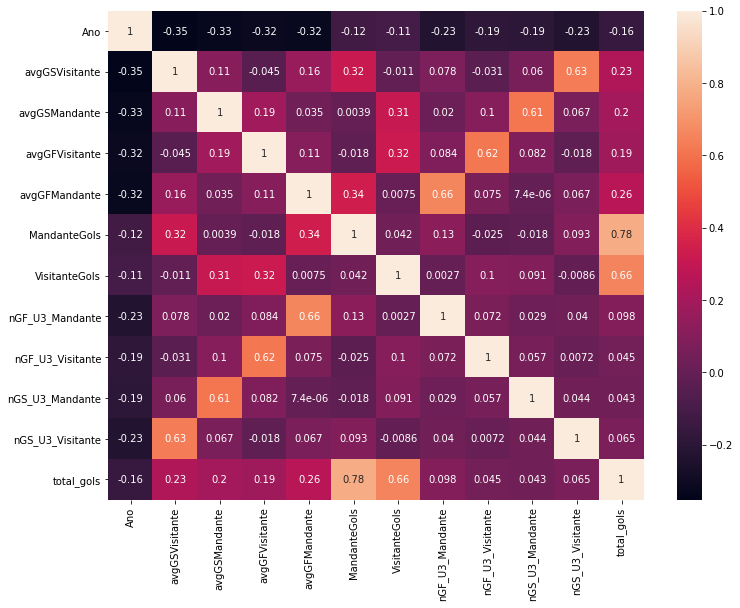

In [166]:
#matriz de correlação plotada
plt.figure(figsize=(12,9))
matriz_correlacao=df_entradas.corr()
sns.heatmap(matriz_correlacao, annot=True)
plt.show()

In [167]:
# dividindo  em intervalos 
df_entradas['faixa_degols'] = df_entradas['total_gols'].apply(lambda x: 0 if x<=3 else 1)
df_entradas['faixa_degols'].value_counts()
                                                          

0    4058
1    1563
Name: faixa_degols, dtype: int64

#### Dividindo os dados para entrada 'X' e saída 'y'

In [169]:
X = df_entradas[['avgGFMandante','avgGFVisitante','avgGSMandante','avgGSVisitante','nGF_U3_Mandante','nGS_U3_Mandante','nGF_U3_Visitante','nGS_U3_Visitante'
                  ]]
y = df_entradas['faixa_degols']

#### Tratando desbalanceamento 

In [170]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X, y = nr.fit_sample(X, y)
np.bincount(y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([1563, 1563])

#### Efetuando normalização dos dados

In [171]:
#importando o preprocessamento com o MinMax
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_escaler = sc_X.fit_transform(X)


#### Dividindo dados para treino e teste (Validação cruzada)

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_escaler, y, test_size=0.3, random_state=0)

#### Resultados Para Regressão Logistica 

In [173]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [174]:
y_pred = classifier.predict(X_test)

In [175]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("Acurácia para a classificação :  ",accuracy_score(y_pred,y_test))
print(cross_val_score(classifier, X_test, y_test,cv=5))

Acurácia para a classificação :   0.6535181236673774
[0.65957447 0.65425532 0.68085106 0.62032086 0.67914439]


#### Resultados para KNN

In [176]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)

In [177]:
clf_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [178]:
y_pred_KNN = clf_KNN.predict(X_test)

In [179]:
from sklearn.metrics import accuracy_score
print("Acurácia para a classificação utilizando o KNN:  ",accuracy_score(y_pred_KNN,y_test))
print(cross_val_score(clf_KNN, X_test, y_test,cv=5))

Acurácia para a classificação utilizando o KNN:   0.6460554371002132
[0.62234043 0.61702128 0.64893617 0.65240642 0.67379679]


#### Resultados para Arvore de decisão 

In [180]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
# Cria o objeto de classificação através do 
clf_arvore = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf_arvore = clf_arvore.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred_arvore = clf_arvore.predict(X_test)

In [182]:
from sklearn.metrics import classification_report
print("O valor de f1-score para a árvore de decisão é:\n ",classification_report(y_test,y_pred_arvore))
print(cross_val_score(clf_arvore, X_test, y_test,cv=5))

O valor de f1-score para a árvore de decisão é:
                precision    recall  f1-score   support

           0       0.60      0.59      0.59       490
           1       0.56      0.58      0.57       448

    accuracy                           0.58       938
   macro avg       0.58      0.58      0.58       938
weighted avg       0.58      0.58      0.58       938

[0.59042553 0.54787234 0.57978723 0.58823529 0.56684492]


#### Resultados para floresta randomica

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
#define a floresta randomica
clf_floresta = RandomForestClassifier(max_depth=9, random_state=1,n_estimators=1000,min_samples_split=2,max_features='sqrt',oob_score=True)
clf_floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [185]:
#Realiza a previsão de classificaçao 
y_pred_floresta = clf_floresta.predict(X_test)

In [186]:
print("O valor de f1-score para a floresta randômica é:\n ",classification_report(y_test,y_pred_floresta))
score = (cross_val_score(clf_floresta, X_train, y_train,cv=5))
score.mean()

O valor de f1-score para a floresta randômica é:
                precision    recall  f1-score   support

           0       0.71      0.77      0.74       490
           1       0.72      0.66      0.69       448

    accuracy                           0.72       938
   macro avg       0.72      0.71      0.71       938
weighted avg       0.72      0.72      0.72       938



0.7029246732077364

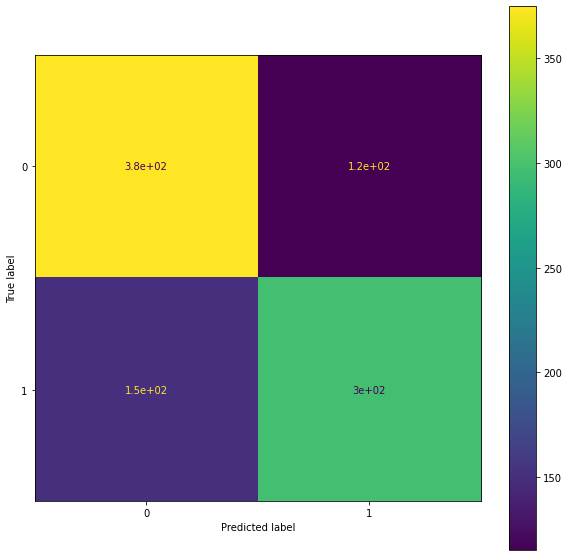

In [187]:
from sklearn.metrics import plot_confusion_matrix
#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(10, 10)
plot_confusion_matrix(clf_floresta, X_test, y_test)
plt.show()

#### Resultados para MLP

In [188]:
#MLP como classificador
from sklearn.neural_network import MLPClassifier
#define a configuração da rede
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

#realiza o fit do modelo
clf_mlp.fit(X_train,y_train)


#realiza a previsão
y_pred_mlp=clf_mlp.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [189]:
print("O valor de f1-score para MLP é:\n ",classification_report(y_test,y_pred_mlp))
print(cross_val_score(clf_mlp, X_train, y_train,cv=5))

O valor de f1-score para MLP é:
                precision    recall  f1-score   support

           0       0.68      0.67      0.67       490
           1       0.64      0.66      0.65       448

    accuracy                           0.66       938
   macro avg       0.66      0.66      0.66       938
weighted avg       0.66      0.66      0.66       938



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.67123288 0.67579909 0.69406393 0.67734554 0.67505721]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


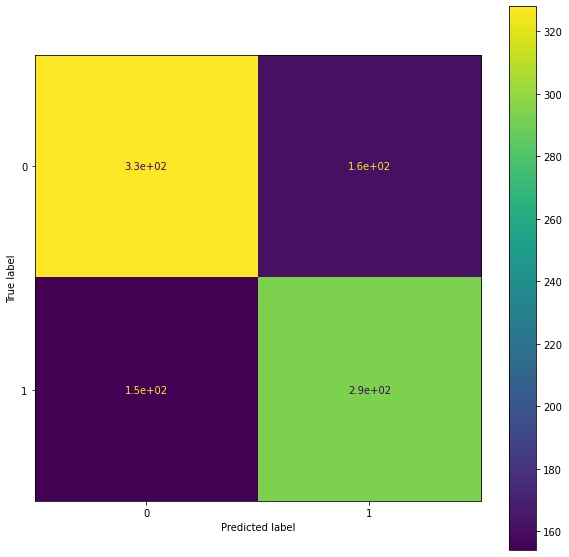

In [190]:

#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(10, 10)
plot_confusion_matrix(clf_mlp, X_test, y_test)
plt.show()